<a href="https://colab.research.google.com/github/ykp-cmd/image-processing/blob/main/main_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capy

/content/drive/My Drive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capy


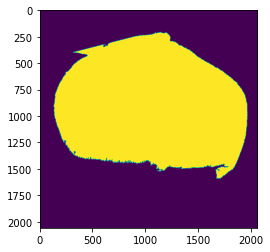

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

def image_rotate():
    # sort by filesize, append counted number of elements
    fg_imgs = glob.glob('/content/drive/MyDrive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capycopied/fgcapy/*.jpg')

    index = 0
    for fg_img in fg_imgs:
        index+=1
    if index <= 3:
        fname1 = os.path.splitext(os.path.basename(fg_img))[0]

        original_image = cv2.imread(fg_img)

        h, w = original_image.shape[:2]
        size = (w, h)

        #set rotation angle
        angle = 10
        angle_rad = angle/180.0*np.pi

        #calculate image size after rotation
        w_rot = int(np.round(h*np.absolute(np.sin(angle_rad))+w*np.absolute(np.cos(angle_rad))))
        h_rot = int(np.round(h*np.absolute(np.cos(angle_rad))+w*np.absolute(np.sin(angle_rad))))
        size_rot = (w_rot, h_rot)

        #rotate around the centre of the original image
        center = (w/2, h/2)
        scale = 1.0
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

        #add a parallel shift(rotation + translation)
        affine_matrix = rotation_matrix.copy()
        affine_matrix[0][2] = affine_matrix[0][2] -w/2 + w_rot/2
        affine_matrix[1][2] = affine_matrix[1][2] -h/2 + h_rot/2

        rotated_original_image = cv2.warpAffine(original_image, affine_matrix, size_rot, flags=cv2.INTER_CUBIC)
        
        fg_img = cv2.cvtColor(rotated_original_image, cv2.COLOR_BGR2RGB) #convert BGR into RGB
        rs1 = cv2.resize(fg_img, (1500, 1000)) 
        plt.imshow(rs1)
        plt.show()

        hsv = cv2.cvtColor(rs1, cv2.COLOR_BGR2HSV)

        #binarise
        bin_img = cv2.inRange(hsv, (28, 78, 40), (240, 240, 240))
        plt.imshow(bin_img)
        plt.show()

        #extract contours
        contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        #get the contour with the largest area
        contour = max(contours, key=lambda x: cv2.contourArea(x))

        #do the mask
        mask = np.zeros_like(bin_img)
        cv2.drawContours(mask, [contour], -1, color=255, thickness=-1)
        
plt.imshow(original_image)
plt.show()
plt.imshow(rs1)
plt.show()
plt.imshow(bin_img)
plt.show()

